
> Да се изберат пет различни временски серии кои имаат во себе податоци за изминатите 4 години (на пример податоци од берза, криптовалути, цена на нафта, цена на злато, цена на земен гас). Потоа,
да се направат наједноставни Pearson
корелации помеѓу податоците. За крај, да се најдат и неколку други видови на корелација помеѓу податоците, меѓу кои и
корелација со зададен window (за истата да се пробаат повеќе вредности за window кои имаат смисла согласно
податоците).

---







[link text](https://)Вчитување на потребнитe библиотеки.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import autocorrelation_plot

Читање на податочно множество кое содржи пет временски серии и се состои од податоци за берза на злато.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/goldstock v1.csv')

In [ ]:
df

Unnamed: 0        Date   Close    Volume    Open    High     Low
0              0  2024-01-19  2029.3  166078.0  2027.4  2041.9  2022.2
1              1  2024-01-18  2021.6  167013.0  2009.1  2025.6  2007.7
2              2  2024-01-17  2006.5  245194.0  2031.7  2036.1  2004.6
3              3  2024-01-16  2030.2  277995.0  2053.4  2062.8  2027.6
4              4  2024-01-12  2051.6  250946.0  2033.2  2067.3  2033.1
...          ...         ...     ...       ...     ...     ...     ...
2506        2528  2014-01-28  1250.5   81426.0  1254.9  1261.9  1248.0
2507        2529  2014-01-27  1263.5   63419.0  1269.9  1280.1  1252.0
2508        2530  2014-01-24  1264.5   34998.0  1264.3  1273.2  1256.9
2509        2531  2014-01-23  1262.5   41697.0  1235.1  1267.1  1230.8
2510        2532  2014-01-22  1238.6   80262.0  1240.5  1243.5  1235.5

[2511 rows x 7 columns]

*   **Date**: A unique date for each trading day recorded.
*   **Close:** The closing price of gold on the relevant date.
*   **Volume:** Gold trading volume on the relevant date.
*   **Open:** The opening price of gold on the relevant date.
*   **High:** The highest recorded price of gold during the trading day.
*   **Low:** The lowest price recorded for gold in the trading day.


---



Колоната "Unnamed: 0" содржи индекси на редици па ќе ја отстраниме бидејќи не ни е потребна.

In [ ]:
df=df.drop('Unnamed: 0',axis=1)

In [ ]:
df.head()

Date   Close    Volume    Open    High     Low
0  2024-01-19  2029.3  166078.0  2027.4  2041.9  2022.2
1  2024-01-18  2021.6  167013.0  2009.1  2025.6  2007.7
2  2024-01-17  2006.5  245194.0  2031.7  2036.1  2004.6
3  2024-01-16  2030.2  277995.0  2053.4  2062.8  2027.6
4  2024-01-12  2051.6  250946.0  2033.2  2067.3  2033.1

Проверка дали датасетот содржи null вредности.

In [ ]:
df.isnull().sum()

Date      0
Close     0
Volume    0
Open      0
High      0
Low       0
dtype: int64

Податочното множество не содржи null вредности па продолжуваме понатаму.

Податоците ги сортираме според датум и ги користиме оние од изминатите четири години.

In [ ]:
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
df = df.sort_values(by='Date', ascending=False)

In [ ]:
df.head()

Date   Close    Volume    Open    High     Low
0 2024-01-19  2029.3  166078.0  2027.4  2041.9  2022.2
1 2024-01-18  2021.6  167013.0  2009.1  2025.6  2007.7
2 2024-01-17  2006.5  245194.0  2031.7  2036.1  2004.6
3 2024-01-16  2030.2  277995.0  2053.4  2062.8  2027.6
4 2024-01-12  2051.6  250946.0  2033.2  2067.3  2033.1

In [ ]:
start_date = ('2021-01-01')
end_date = pd.to_datetime('today')
df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]


In [ ]:
df

Date   Close    Volume    Open    High     Low
0   2024-01-19  2029.3  166078.0  2027.4  2041.9  2022.2
1   2024-01-18  2021.6  167013.0  2009.1  2025.6  2007.7
2   2024-01-17  2006.5  245194.0  2031.7  2036.1  2004.6
3   2024-01-16  2030.2  277995.0  2053.4  2062.8  2027.6
4   2024-01-12  2051.6  250946.0  2033.2  2067.3  2033.1
..         ...     ...       ...     ...     ...     ...
758 2021-01-08  1835.4  422485.0  1915.2  1918.4  1827.8
759 2021-01-07  1913.6  192365.0  1921.5  1929.6  1907.5
760 2021-01-06  1908.6  356182.0  1952.8  1962.5  1902.6
761 2021-01-05  1954.4  192111.0  1946.0  1957.0  1938.4
762 2021-01-04  1946.6  261675.0  1908.2  1948.7  1906.1

[763 rows x 6 columns]

> Во понатамошните пресметки нема да ја користиме колоната "Date" бидејќи таа не ни дава некое мерење туку е само индекс на колоната-опишува за кој ден станува збор.

In [ ]:
df1=df.copy()
df1=df1.drop('Date',axis=1)
df1.head()

Close    Volume    Open    High     Low
0  2029.3  166078.0  2027.4  2041.9  2022.2
1  2021.6  167013.0  2009.1  2025.6  2007.7
2  2006.5  245194.0  2031.7  2036.1  2004.6
3  2030.2  277995.0  2053.4  2062.8  2027.6
4  2051.6  250946.0  2033.2  2067.3  2033.1

Визуализација на податоците.

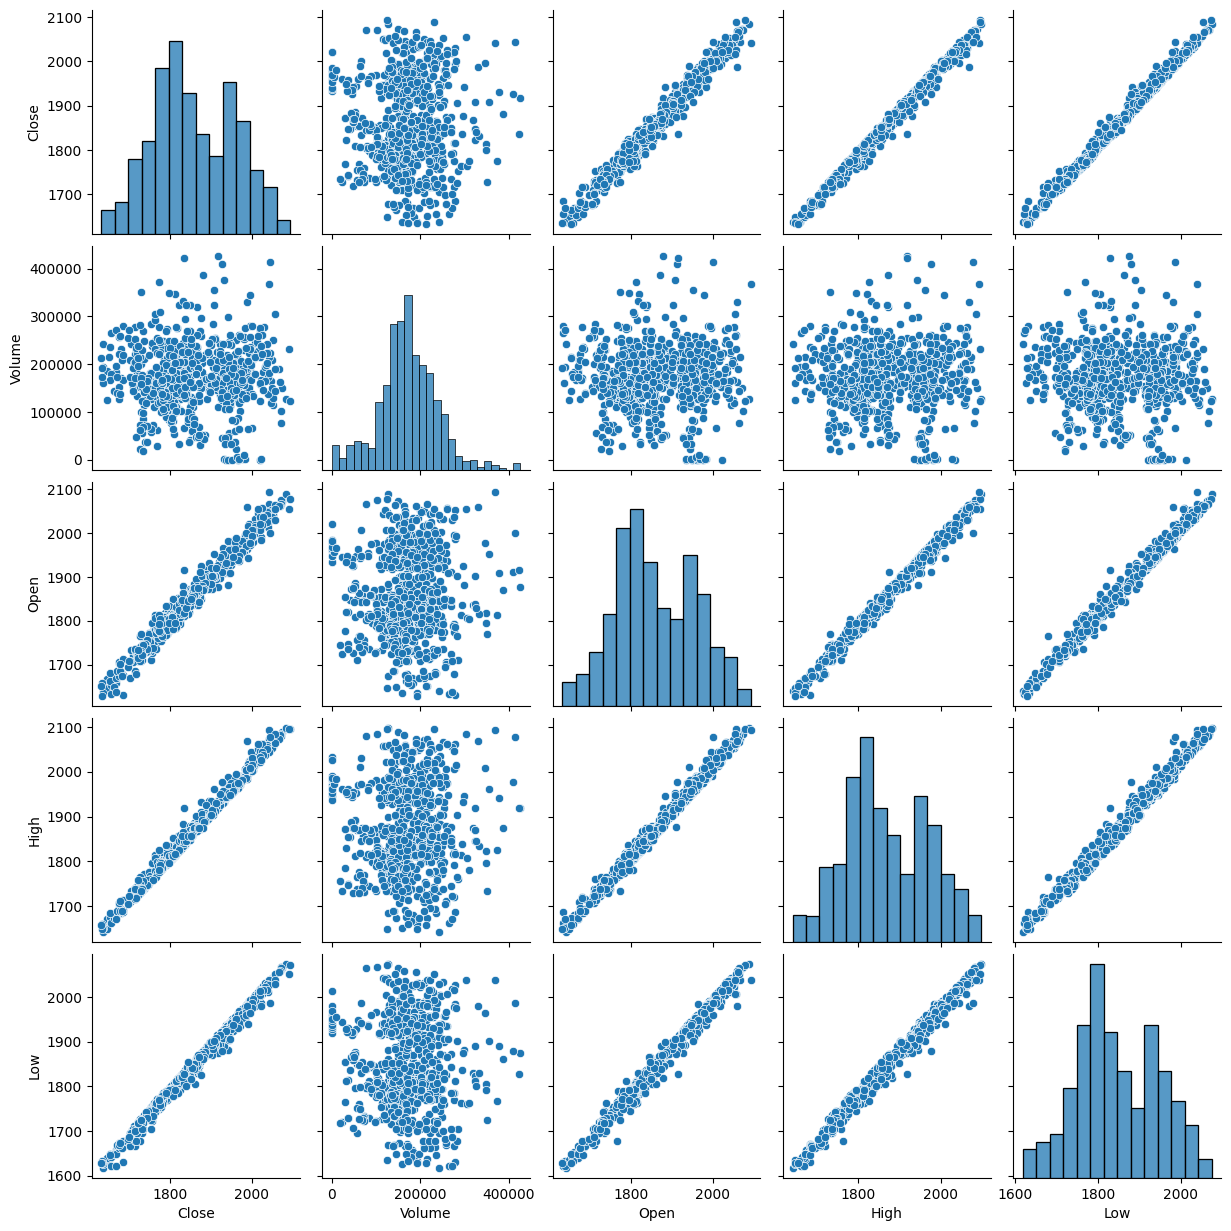

In [ ]:
sns.pairplot(df1)


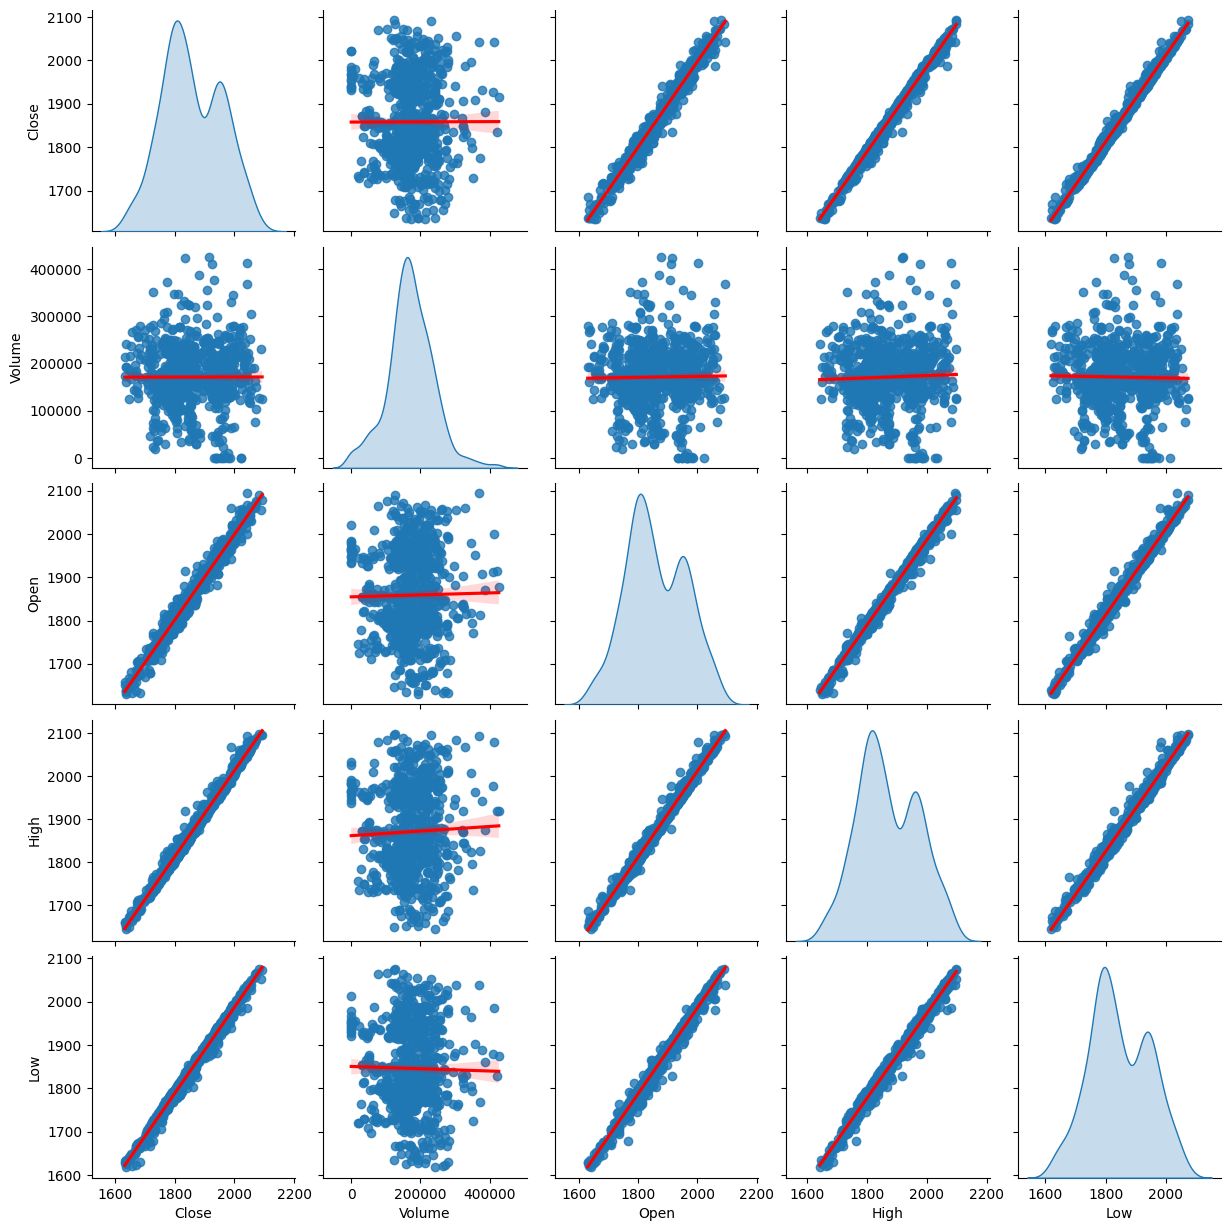

In [ ]:
sns.pairplot(df1, kind='reg', diag_kind='kde',
             plot_kws={'line_kws':{'color':'red'}})

Пирсонова корелација за податочното множество.

In [ ]:
pearson_correlation=df1.corr(method='pearson')
print("Пирсонова корелација")
print(pearson_correlation)

Пирсонова корелација
           Close    Volume      Open      High       Low
Close   1.000000  0.001753  0.987317  0.994236  0.995176
Volume  0.001753  1.000000  0.015363  0.035995 -0.017875
Open    0.987317  0.015363  1.000000  0.994039  0.992495
High    0.994236  0.035995  0.994039  1.000000  0.992402
Low     0.995176 -0.017875  0.992495  0.992402  1.000000


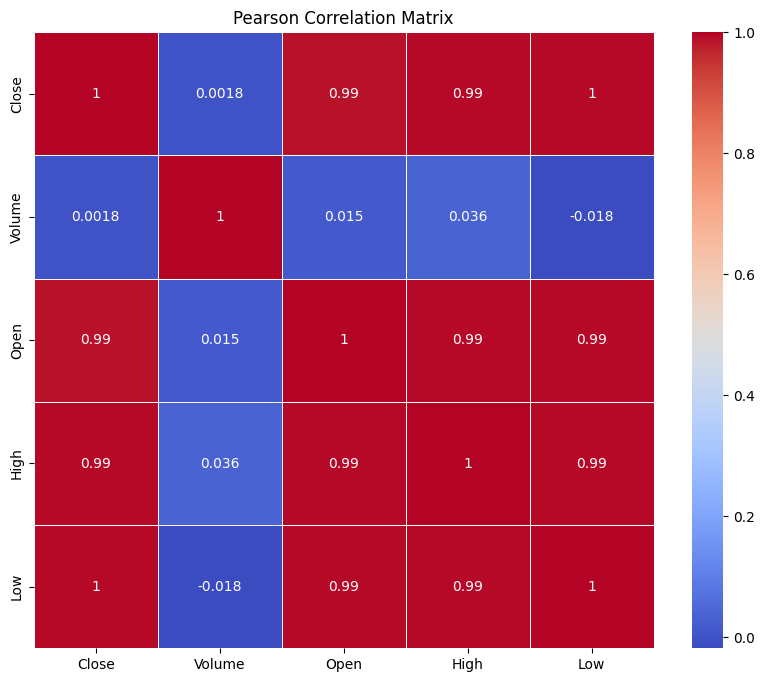

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Pearson Correlation Matrix")
plt.show()

Сперманова корелација  за податочното множество.

In [ ]:
spearman_correlation = df1.corr(method='spearman')
print("Сперманова корелација")
print(spearman_correlation)

Сперманова корелација
           Close    Volume      Open      High       Low
Close   1.000000  0.024219  0.985842  0.993320  0.994922
Volume  0.024219  1.000000  0.036281  0.055065  0.007996
Open    0.985842  0.036281  1.000000  0.993567  0.991287
High    0.993320  0.055065  0.993567  1.000000  0.991923
Low     0.994922  0.007996  0.991287  0.991923  1.000000


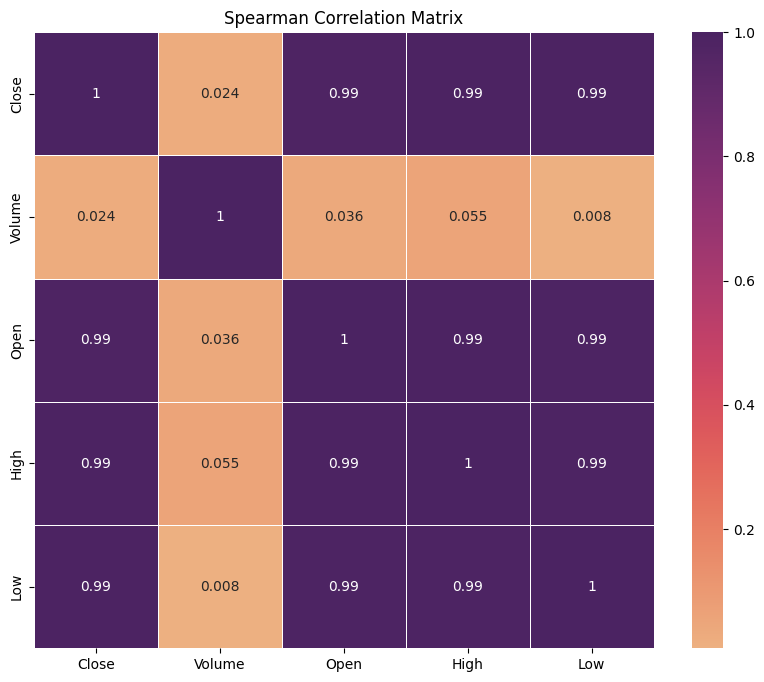

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_correlation, annot=True, cmap='flare', linewidths=0.5)
plt.title("Spearman Correlation Matrix")
plt.show()

Автокорелација за податочното множество.

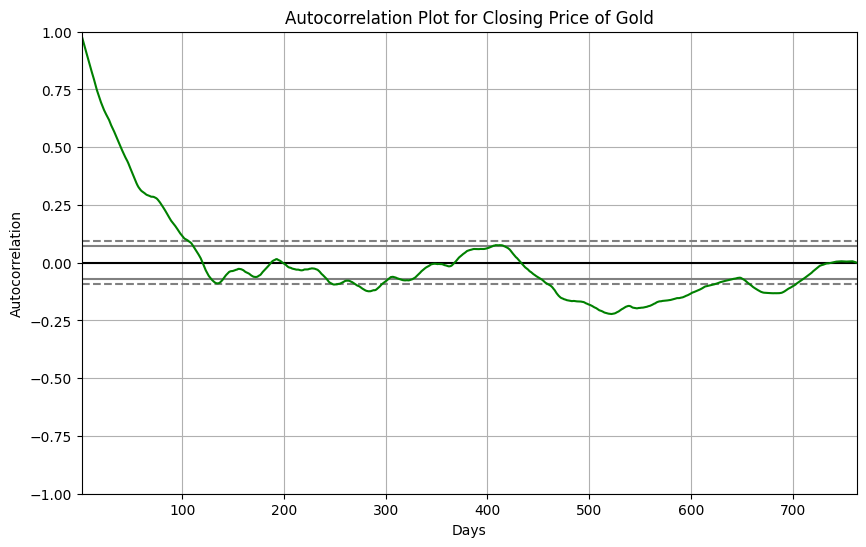

In [ ]:
plt.figure(figsize=(10, 6))
autocorrelation_plot(df1['Close'], color='green')
plt.title('Autocorrelation Plot for Closing Price of Gold')
plt.xlabel('Days')
plt.ylabel('Autocorrelation')
plt.show()

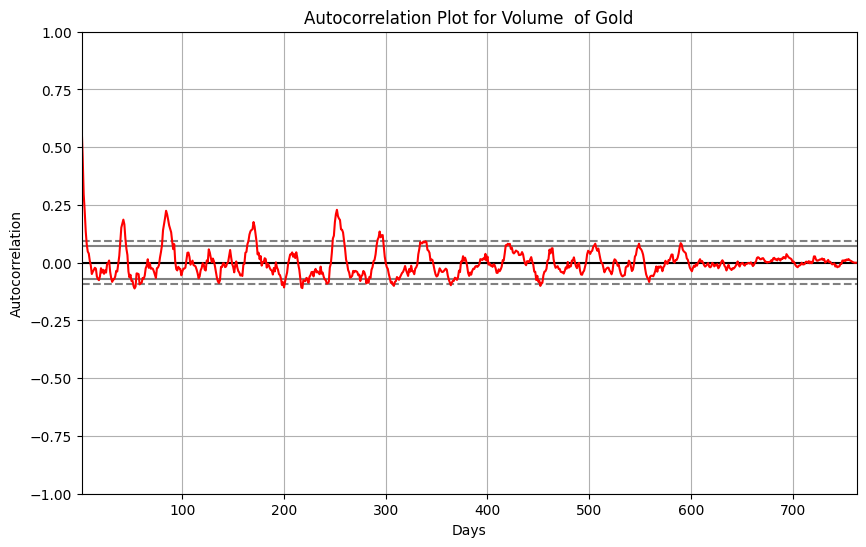

In [ ]:
plt.figure(figsize=(10, 6))
autocorrelation_plot(df1['Volume'], color='red')
plt.title('Autocorrelation Plot for Volume  of Gold')
plt.xlabel('Days')
plt.ylabel('Autocorrelation')
plt.show()

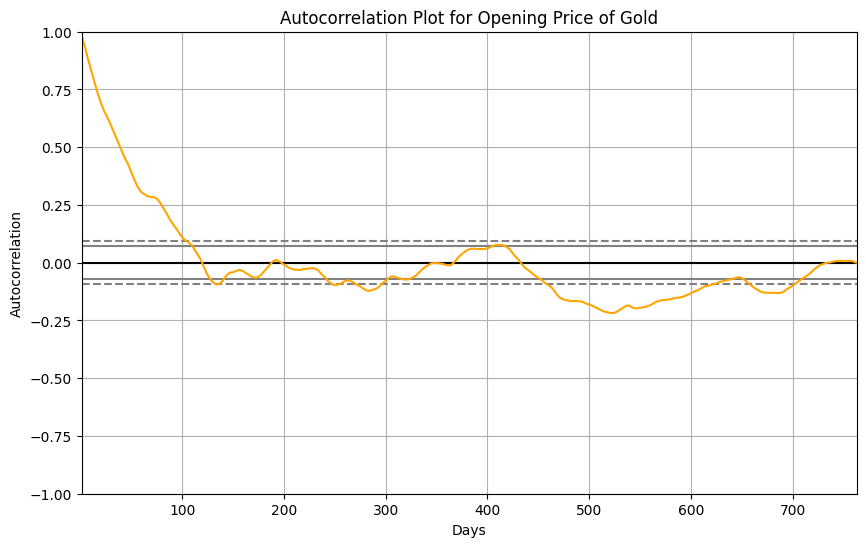

In [ ]:
plt.figure(figsize=(10, 6))
autocorrelation_plot(df1['Open'], color='orange')
plt.title('Autocorrelation Plot for Opening Price of Gold')
plt.xlabel('Days')
plt.ylabel('Autocorrelation')
plt.show()

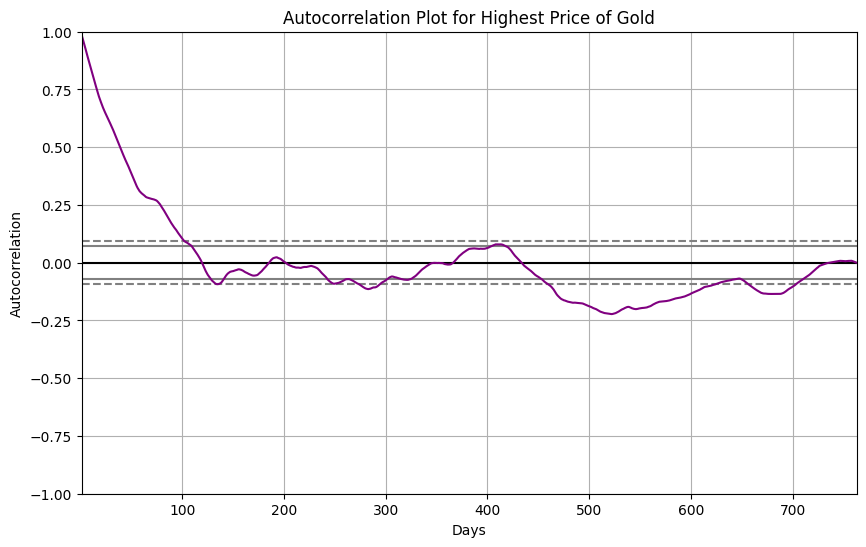

In [ ]:
plt.figure(figsize=(10, 6))
autocorrelation_plot(df1['High'], color='purple')
plt.title('Autocorrelation Plot for Highest Price of Gold')
plt.xlabel('Days')
plt.ylabel('Autocorrelation')
plt.show()

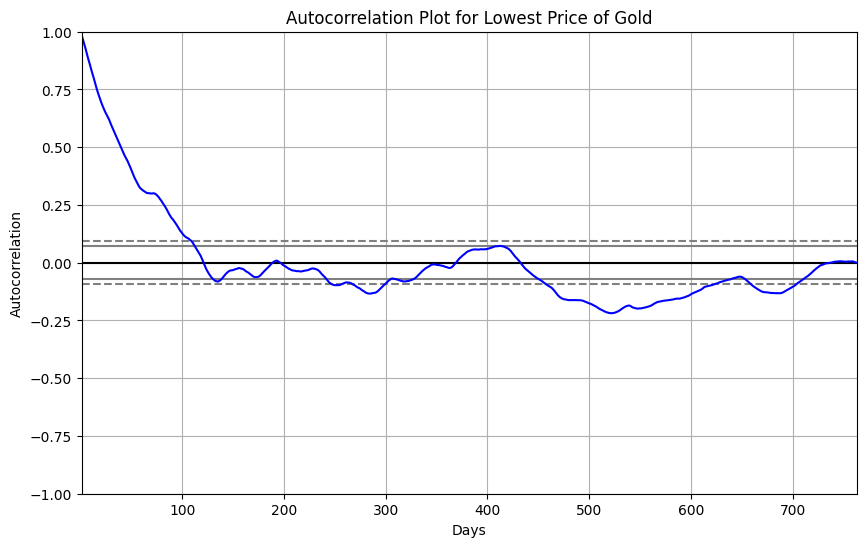

In [ ]:
plt.figure(figsize=(10, 6))
autocorrelation_plot(df1['Low'], color='blue')
plt.title('Autocorrelation Plot for Lowest Price of Gold')
plt.xlabel('Days')
plt.ylabel('Autocorrelation')
plt.show()



Ролинг корелација за податочното множество со различни големини на прозорец.



> Бидејќи податочното множество се состои од дневни мерења-временски серии користиме прозорци со големина од 10,30,60 и 90.

In [ ]:
columns=['Close','Volume','Open','High','Low']
sizes=[10,30,60,90]

In [ ]:
rolling_correlations = {}
for n in sizes:
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            col1 = columns[i]
            col2 = columns[j]
            name = f'{col1}_{col2}_window_{n}'
            rolling_correlations[name] = df[col1].rolling(window=n).corr(df[col2])
for key, correlation_series in rolling_correlations.items():
    print(f"\nRolling Correlation for {name}:\n")
    print(correlation_series.dropna().head(10))



Rolling Correlation for High_Low_window_90:

9    -0.050830
10   -0.311820
11   -0.428574
12   -0.545081
13   -0.654033
14   -0.799149
15   -0.755008
16   -0.720727
17   -0.668950
18   -0.494660
dtype: float64

Rolling Correlation for High_Low_window_90:

9     0.426873
10    0.494990
11    0.476530
12    0.624408
13    0.769383
14    0.916374
15    0.884676
16    0.851749
17    0.789786
18    0.772797
dtype: float64

Rolling Correlation for High_Low_window_90:

9     0.744087
10    0.739777
11    0.776444
12    0.808137
13    0.873588
14    0.916520
15    0.946253
16    0.933460
17    0.918916
18    0.870319
dtype: float64

Rolling Correlation for High_Low_window_90:

9     0.854110
10    0.877739
11    0.892581
12    0.906668
13    0.929281
14    0.967865
15    0.960746
16    0.954045
17    0.953624
18    0.937154
dtype: float64

Rolling Correlation for High_Low_window_90:

9     0.367903
10    0.054248
11   -0.230701
12   -0.368620
13   -0.656510
14   -0.661769
15   -0.586810
16   

Прикажани се сите комбинации парови на колони со ролинг корелација за дадените прозорци со големина 10,30,60,90. За полесно разбирање прикажани се првите 10 не NaN вредности.

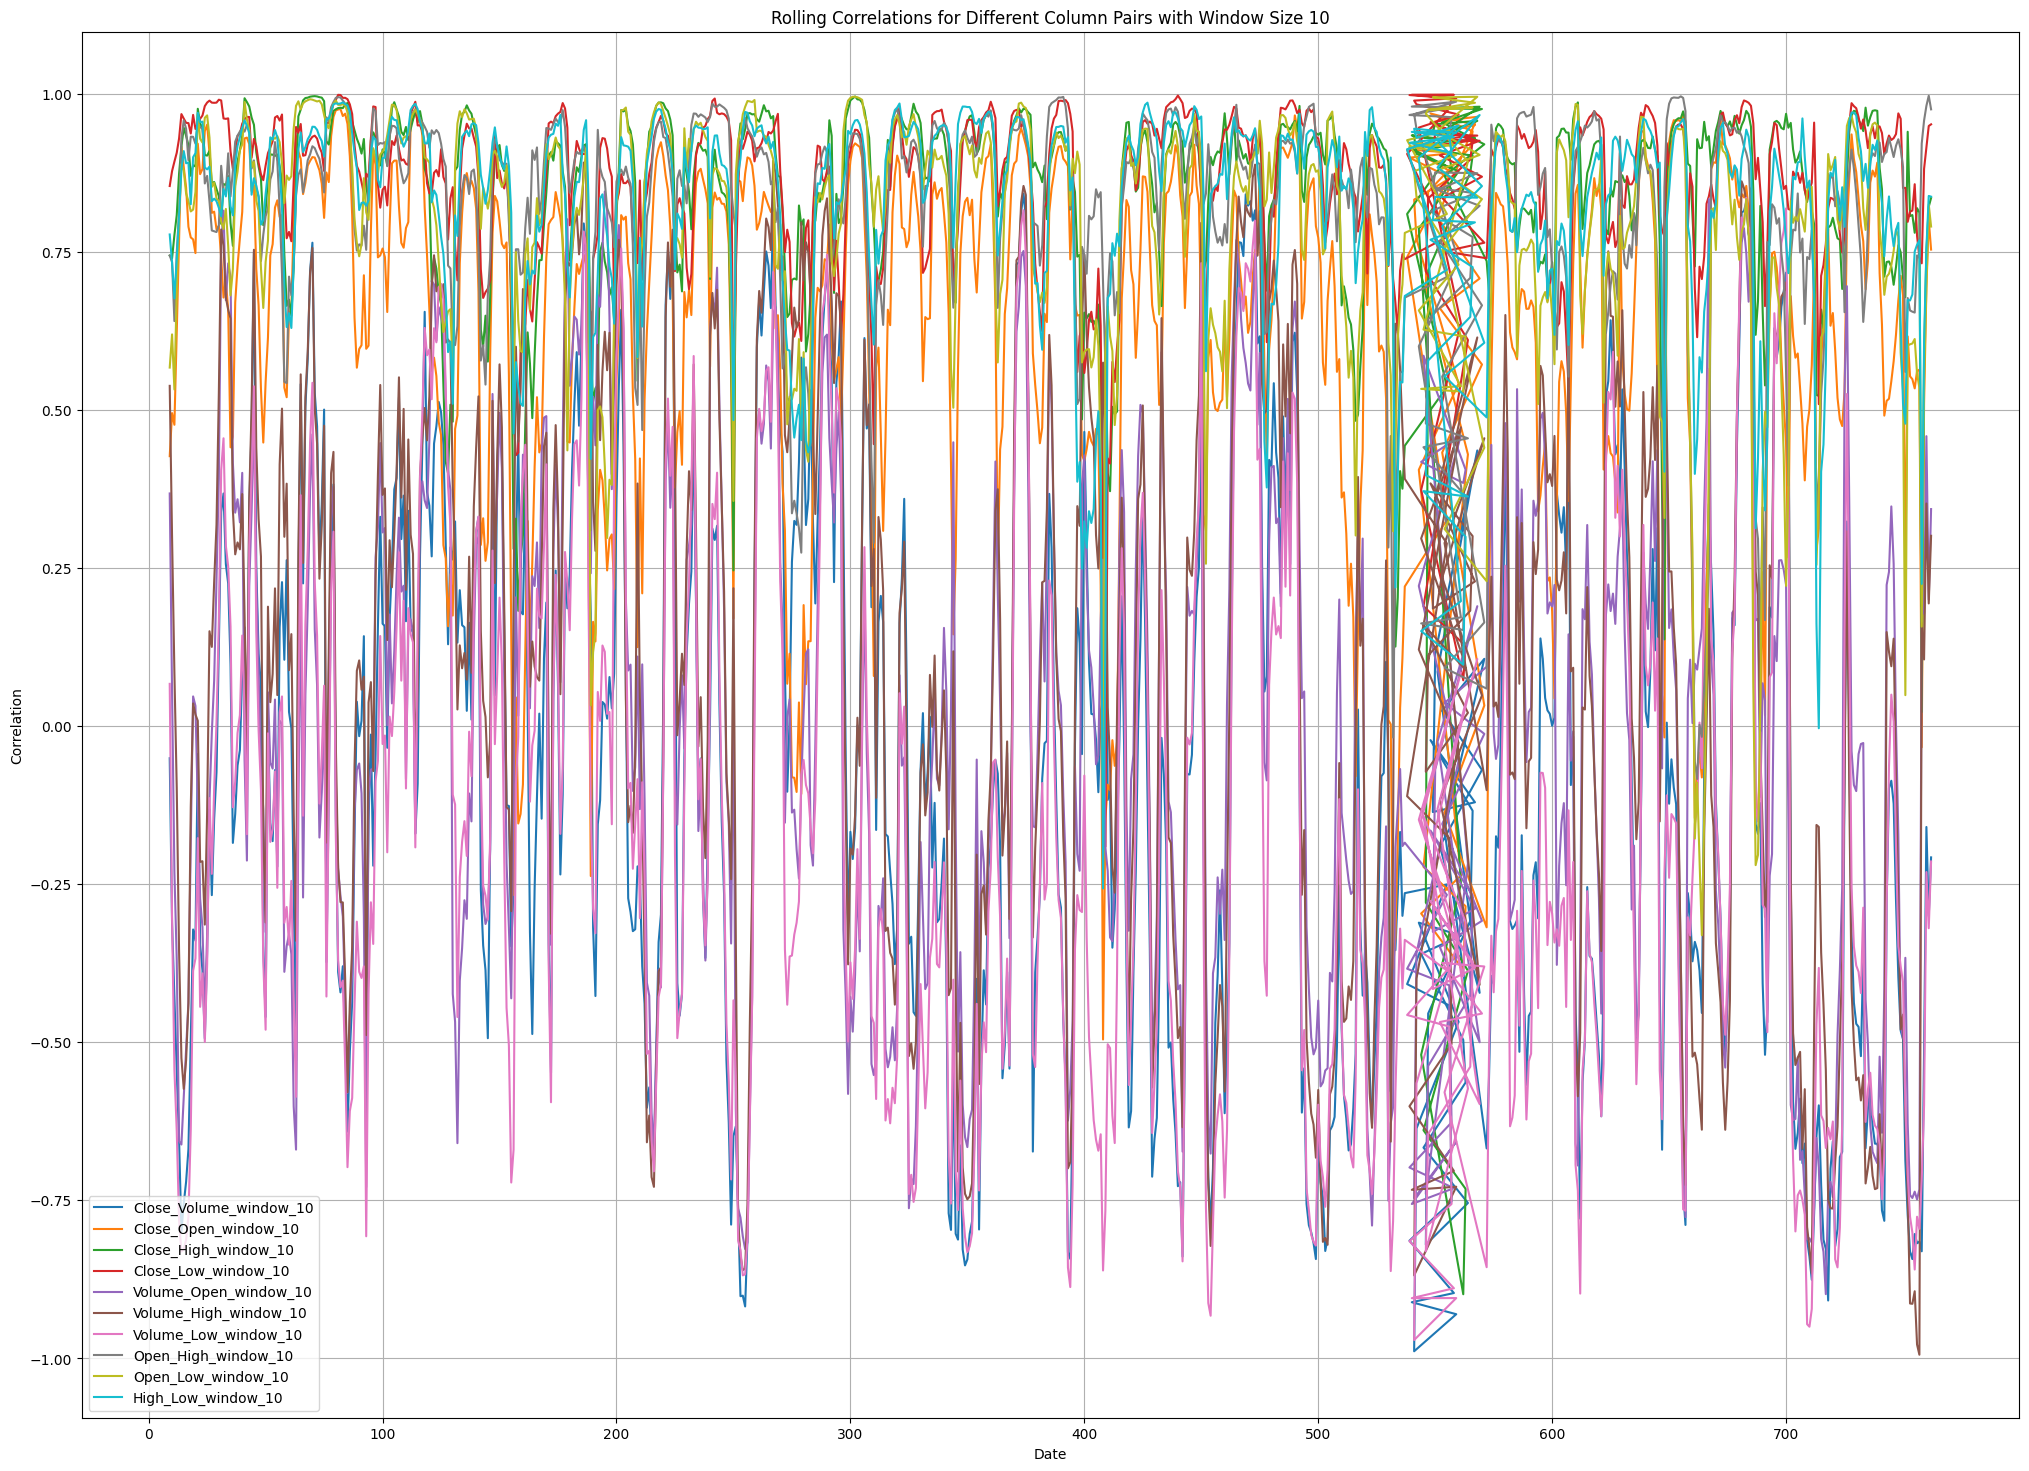

In [ ]:
import matplotlib.pyplot as plt
rolling_correlations = {}
for i in range(len(columns)):
  for j in range(i + 1, len(columns)):
    col1 = columns[i]
    col2 = columns[j]
    name = f'{col1}_{col2}_window_{10}'
    rolling_correlations[name] = df[col1].rolling(window=10).corr(df[col2])
plt.figure(figsize=(25, 18))
for key, correlation_series in rolling_correlations.items():
    plt.plot(correlation_series, label=key)

plt.title('Rolling Correlations for Different Column Pairs with Window Size 10')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.legend(loc='best')
plt.grid(True)
plt.show()


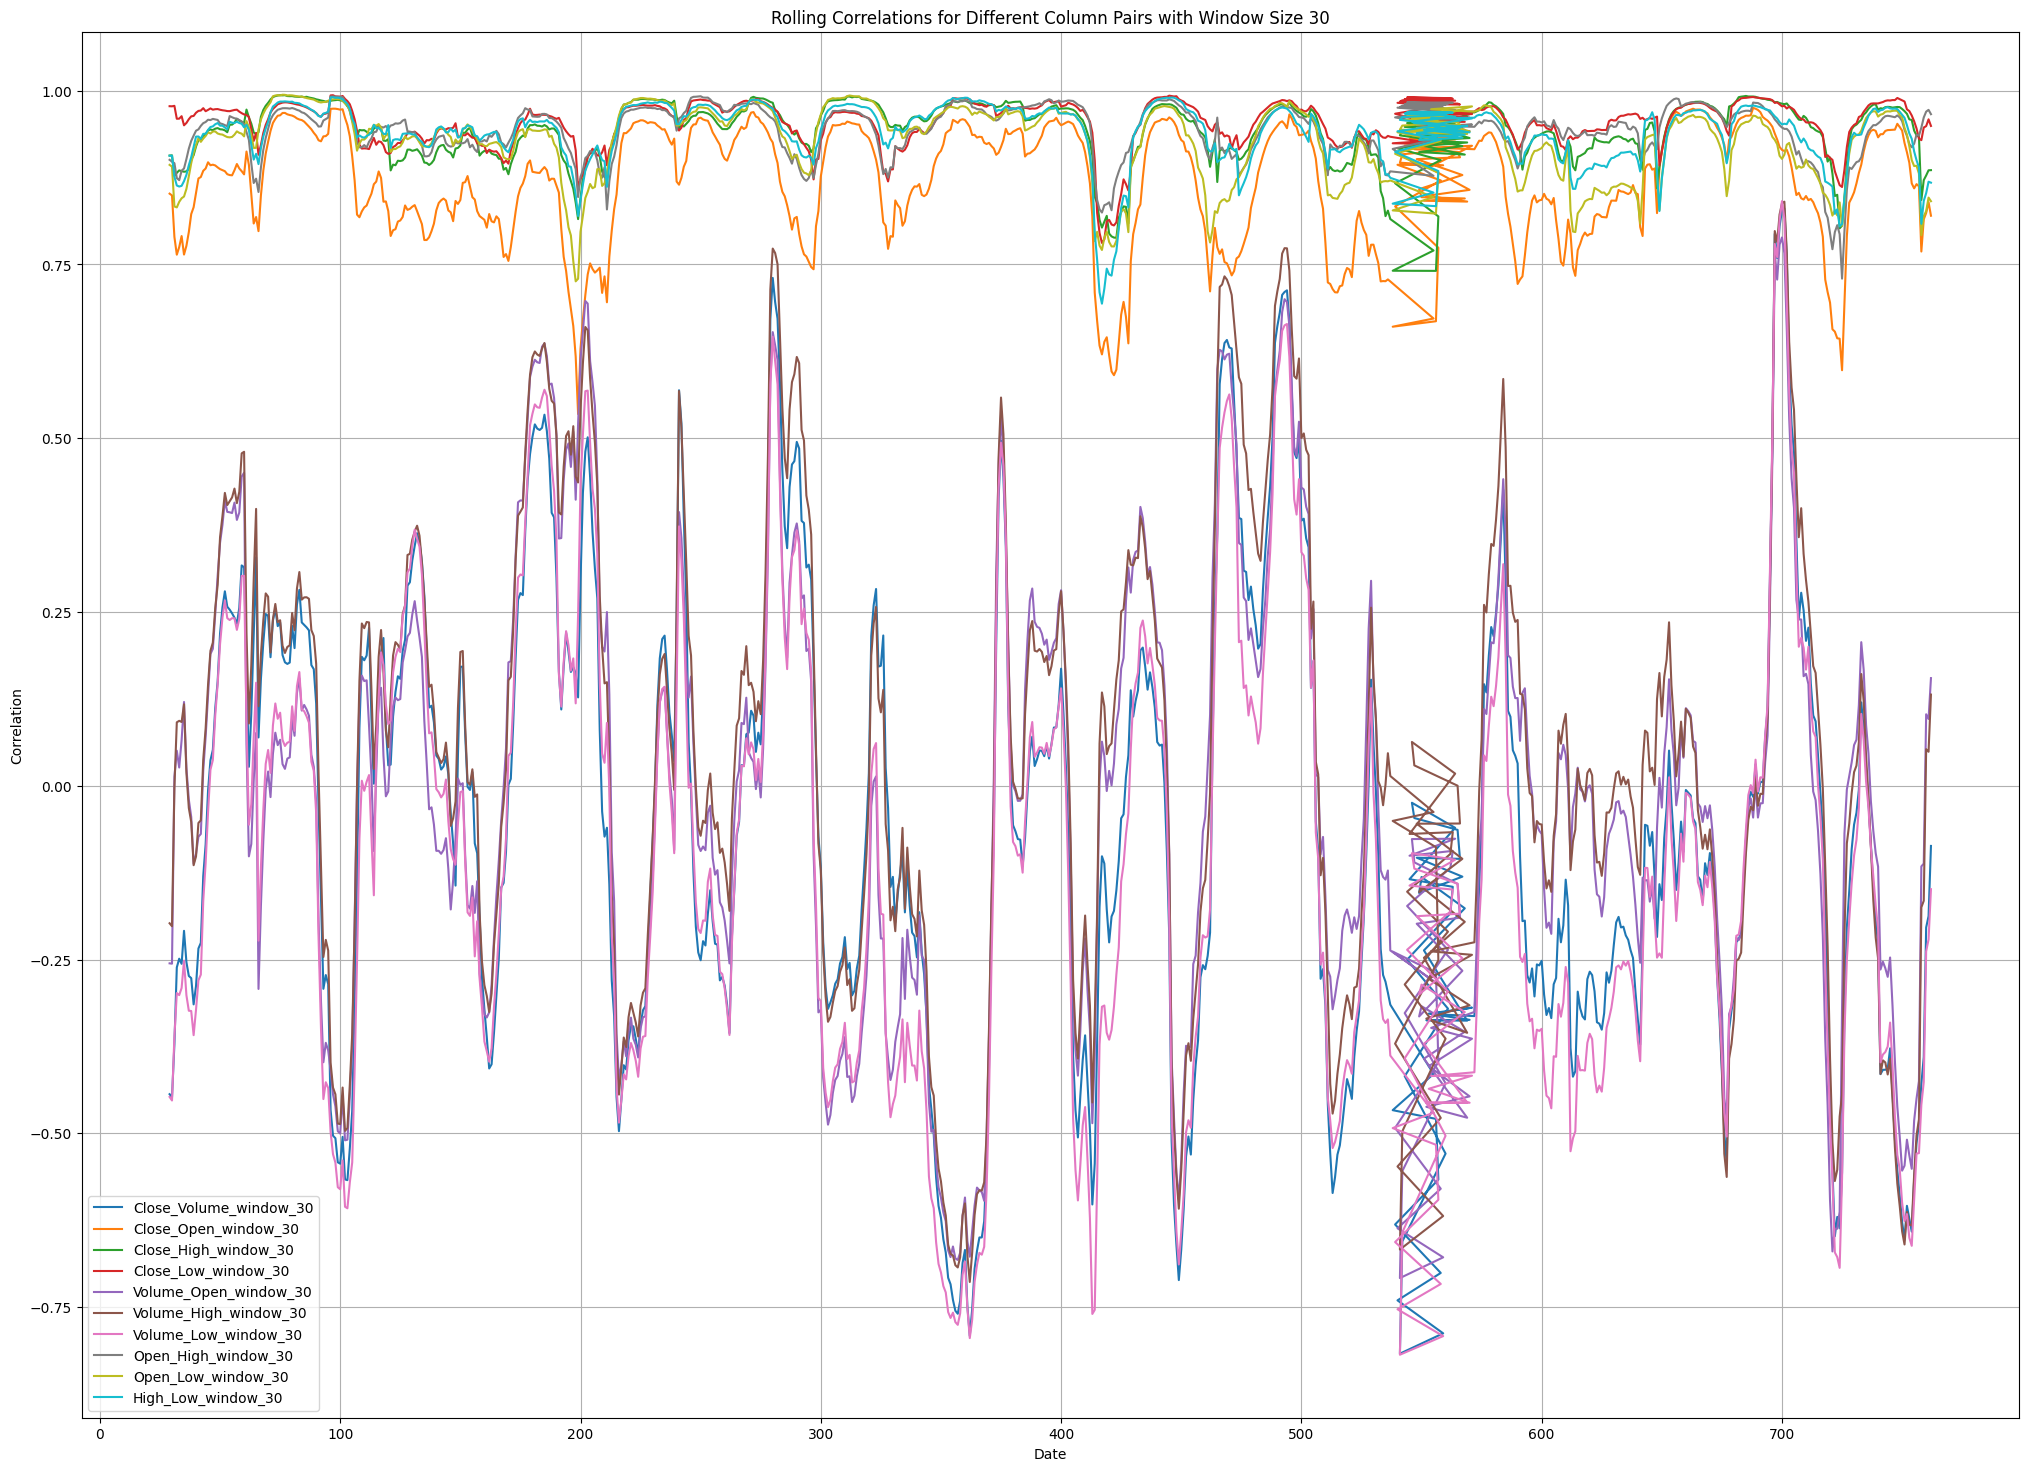

In [ ]:
import matplotlib.pyplot as plt
rolling_correlations = {}
for i in range(len(columns)):
  for j in range(i + 1, len(columns)):
    col1 = columns[i]
    col2 = columns[j]
    name = f'{col1}_{col2}_window_{30}'
    rolling_correlations[name] = df[col1].rolling(window=30).corr(df[col2])
plt.figure(figsize=(25, 18))
for key, correlation_series in rolling_correlations.items():
    plt.plot(correlation_series, label=key)

plt.title('Rolling Correlations for Different Column Pairs with Window Size 30')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.legend(loc='best')
plt.grid(True)
plt.show()


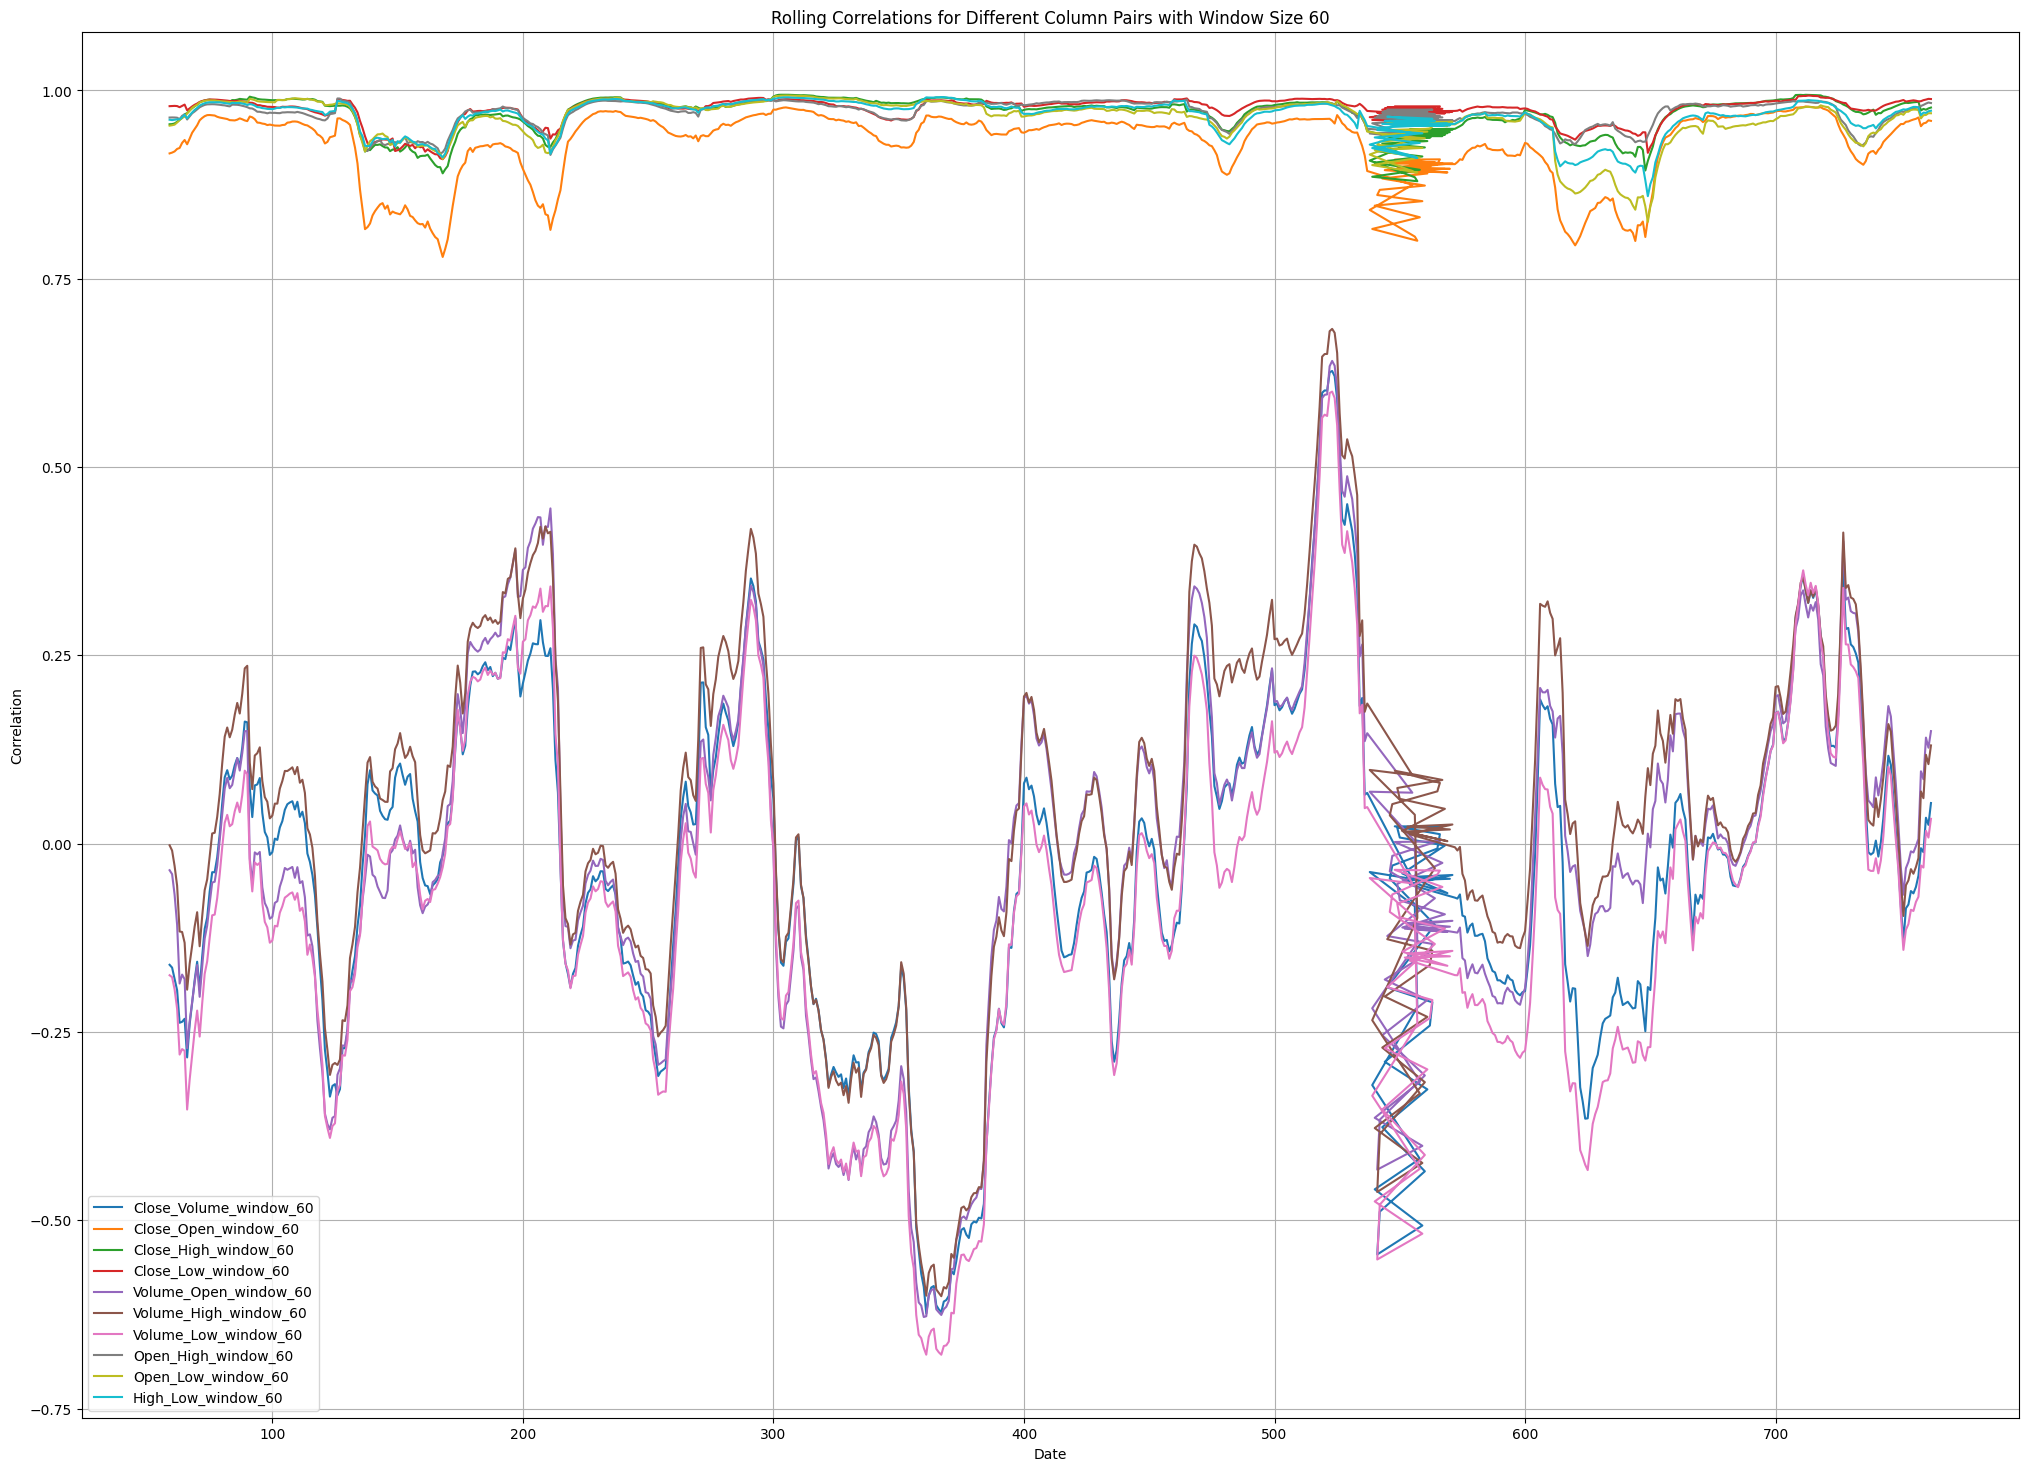

In [ ]:
import matplotlib.pyplot as plt
rolling_correlations = {}
for i in range(len(columns)):
  for j in range(i + 1, len(columns)):
    col1 = columns[i]
    col2 = columns[j]
    name = f'{col1}_{col2}_window_{60}'
    rolling_correlations[name] = df[col1].rolling(window=60).corr(df[col2])
plt.figure(figsize=(25, 18))
for key, correlation_series in rolling_correlations.items():
    plt.plot(correlation_series, label=key)

plt.title('Rolling Correlations for Different Column Pairs with Window Size 60')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.legend(loc='best')
plt.grid(True)
plt.show()


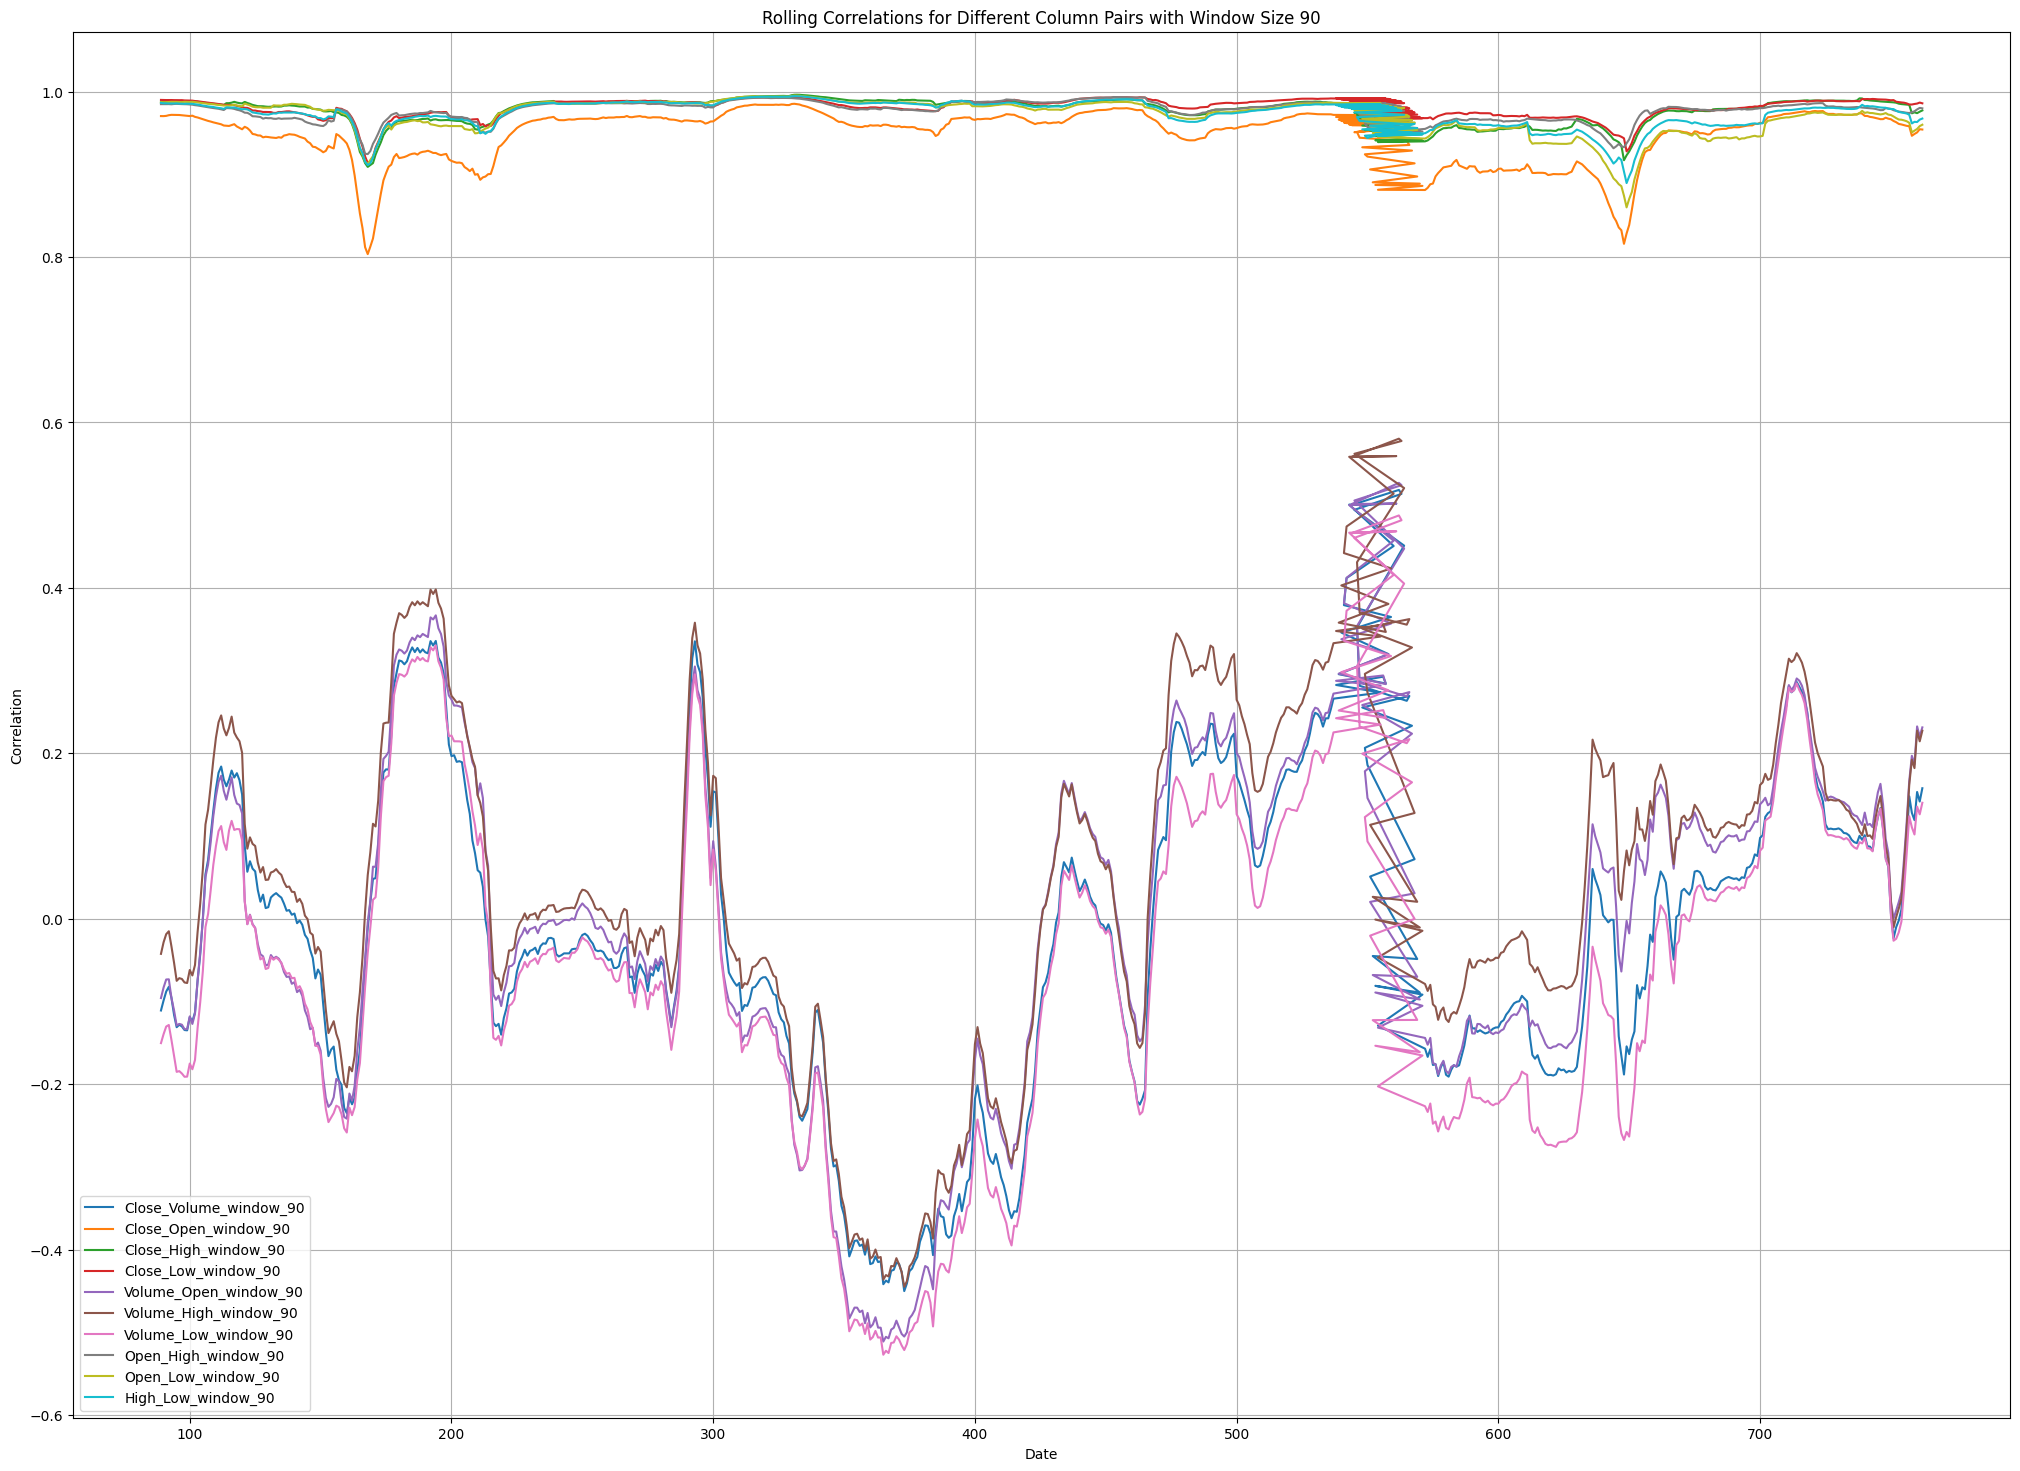

In [ ]:
import matplotlib.pyplot as plt
rolling_correlations = {}
for i in range(len(columns)):
  for j in range(i + 1, len(columns)):
    col1 = columns[i]
    col2 = columns[j]
    name = f'{col1}_{col2}_window_{90}'
    rolling_correlations[name] = df[col1].rolling(window=90).corr(df[col2])
plt.figure(figsize=(25, 18))
for key, correlation_series in rolling_correlations.items():
    plt.plot(correlation_series, label=key)

plt.title('Rolling Correlations for Different Column Pairs with Window Size 90')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.legend(loc='best')
plt.grid(True)
plt.show()
